In [7]:
pip install scikit-learn


  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 8.8 MB/s eta 0:00:0000:010:01
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd

df = pd.read_csv('heart.csv')
print(df.columns)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [3]:
import pandas as pd

df = pd.read_csv('heart.csv')
print(df.info())
print(df['HeartDisease'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
HeartDisease
1    508
0    410
Name: count, dtype: int64


In [9]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Apply label encoding to each
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [10]:
print(df.isnull().sum())


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [11]:
print(f"Duplicates: {df.duplicated().sum()}")
df = df.drop_duplicates()


Duplicates: 0


In [12]:
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    print(f"{col}: {df[col].unique()}")


Sex: [1 0]
ChestPainType: [1 2 0 3]
RestingECG: [1 2 0]
ExerciseAngina: [0 1]
ST_Slope: [2 1 0]


In [13]:
print(df.describe())


              Age         Sex  ChestPainType   RestingBP  Cholesterol  \
count  918.000000  918.000000     918.000000  918.000000   918.000000   
mean    53.510893    0.789760       0.781046  132.396514   198.799564   
std      9.432617    0.407701       0.956519   18.514154   109.384145   
min     28.000000    0.000000       0.000000    0.000000     0.000000   
25%     47.000000    1.000000       0.000000  120.000000   173.250000   
50%     54.000000    1.000000       0.000000  130.000000   223.000000   
75%     60.000000    1.000000       2.000000  140.000000   267.000000   
max     77.000000    1.000000       3.000000  200.000000   603.000000   

        FastingBS  RestingECG       MaxHR  ExerciseAngina     Oldpeak  \
count  918.000000  918.000000  918.000000      918.000000  918.000000   
mean     0.233115    0.989107  136.809368        0.404139    0.887364   
std      0.423046    0.631671   25.460334        0.490992    1.066570   
min      0.000000    0.000000   60.000000        0

In [14]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'LogisticRegression': Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())]),
    'RandomForest': Pipeline([('model', RandomForestClassifier())]),
    'SVM': Pipeline([('scaler', StandardScaler()), ('model', SVC())]),
    'KNN': Pipeline([('scaler', StandardScaler()), ('model', KNeighborsClassifier())]),
    'DecisionTree': Pipeline([('model', DecisionTreeClassifier())]),
}

results = []

for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)
print(results_df)


                Model  Accuracy  Precision    Recall  F1-Score
1        RandomForest  0.880435   0.912621  0.878505  0.895238
2                 SVM  0.864130   0.894231  0.869159  0.881517
0  LogisticRegression  0.847826   0.907216  0.822430  0.862745
3                 KNN  0.847826   0.907216  0.822430  0.862745
4        DecisionTree  0.798913   0.872340  0.766355  0.815920


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print("Best Grid Params:", grid.best_params_)
print("F1 Score:", f1_score(y_test, grid.predict(X_test)))


Best Grid Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 150}
F1 Score: 0.9107981220657277


In [18]:
results_df.loc[len(results_df)] = {
    'Model': 'RandomForest (Tuned)',
    'Accuracy': accuracy_score(y_test, grid.predict(X_test)),
    'Precision': precision_score(y_test, grid.predict(X_test)),
    'Recall': recall_score(y_test, grid.predict(X_test)),
    'F1-Score': f1_score(y_test, grid.predict(X_test))
}

print(results_df.sort_values(by='F1-Score', ascending=False))


                  Model  Accuracy  Precision    Recall  F1-Score
5  RandomForest (Tuned)  0.896739   0.915094  0.906542  0.910798
1          RandomForest  0.880435   0.912621  0.878505  0.895238
2                   SVM  0.864130   0.894231  0.869159  0.881517
0    LogisticRegression  0.847826   0.907216  0.822430  0.862745
3                   KNN  0.847826   0.907216  0.822430  0.862745
4          DecisionTree  0.798913   0.872340  0.766355  0.815920


/var/folders/wh/j04x2kcs3n73h2xpp25dpklr0000gn/T/ipykernel_38146/401439597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='F1-Score', y='Model', palette='viridis')


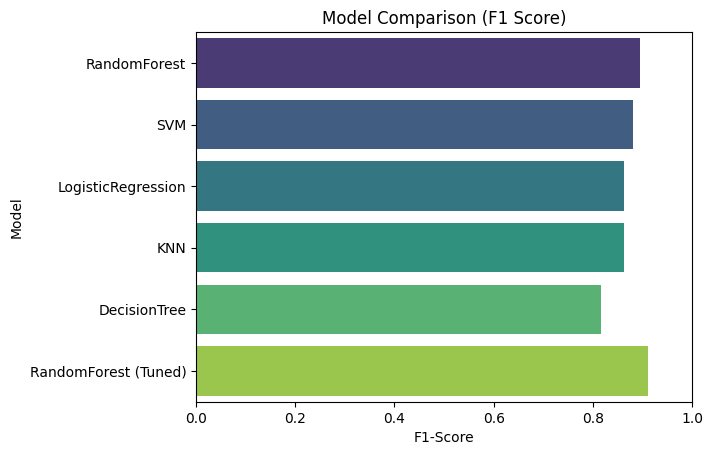

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=results_df, x='F1-Score', y='Model', palette='viridis')
plt.title("Model Comparison (F1 Score)")
plt.xlim(0, 1)
plt.show()


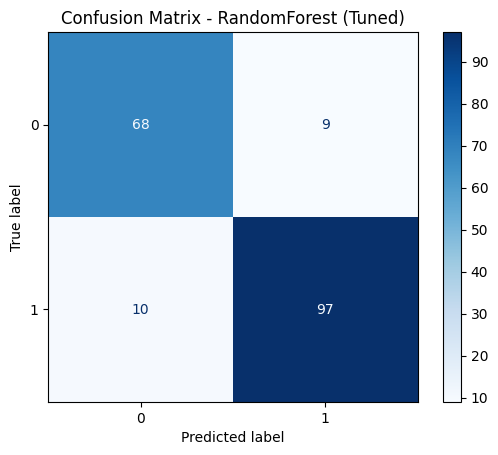

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - RandomForest (Tuned)")
plt.show()


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),        # number of trees
    'max_depth': [None, 5, 10, 15, 20],      # tree depth
    'min_samples_split': randint(2, 11),     # minimum samples to split an internal node
    'min_samples_leaf': randint(1, 5),       # minimum samples at a leaf node
    'max_features': ['sqrt', 'log2'] # number of features to consider at split
}


In [24]:
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=20,                  # Number of random combinations to try
    cv=5,                       # 5-fold cross-validation
    scoring='f1',               # Evaluation metric
    random_state=42,
    n_jobs=-1                   # Use all available cores
)

random_search.fit(X_train, y_train)


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': <scipy.stats....t 0x17e122fb0>, 'min_samples_split': <scipy.stats....t 0x17bbc5c60>, ...}"
,n_iter,20
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [25]:
from sklearn.metrics import f1_score

print("Best RandomSearchCV Params:", random_search.best_params_)
y_pred_random = random_search.predict(X_test)
print("F1 Score (Randomized Search):", f1_score(y_test, y_pred_random))


Best RandomSearchCV Params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 181}
F1 Score (Randomized Search): 0.9056603773584906


In [26]:
results_df.loc[len(results_df)] = {
    'Model': 'RandomForest (Randomized)',
    'Accuracy': accuracy_score(y_test, y_pred_random),
    'Precision': precision_score(y_test, y_pred_random),
    'Recall': recall_score(y_test, y_pred_random),
    'F1-Score': f1_score(y_test, y_pred_random)
}

print(results_df.sort_values(by='F1-Score', ascending=False))


                       Model  Accuracy  Precision    Recall  F1-Score
5       RandomForest (Tuned)  0.896739   0.915094  0.906542  0.910798
6  RandomForest (Randomized)  0.891304   0.914286  0.897196  0.905660
1               RandomForest  0.880435   0.912621  0.878505  0.895238
2                        SVM  0.864130   0.894231  0.869159  0.881517
0         LogisticRegression  0.847826   0.907216  0.822430  0.862745
3                        KNN  0.847826   0.907216  0.822430  0.862745
4               DecisionTree  0.798913   0.872340  0.766355  0.815920


/var/folders/wh/j04x2kcs3n73h2xpp25dpklr0000gn/T/ipykernel_38146/366754536.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df.sort_values(by='F1-Score', ascending=True),


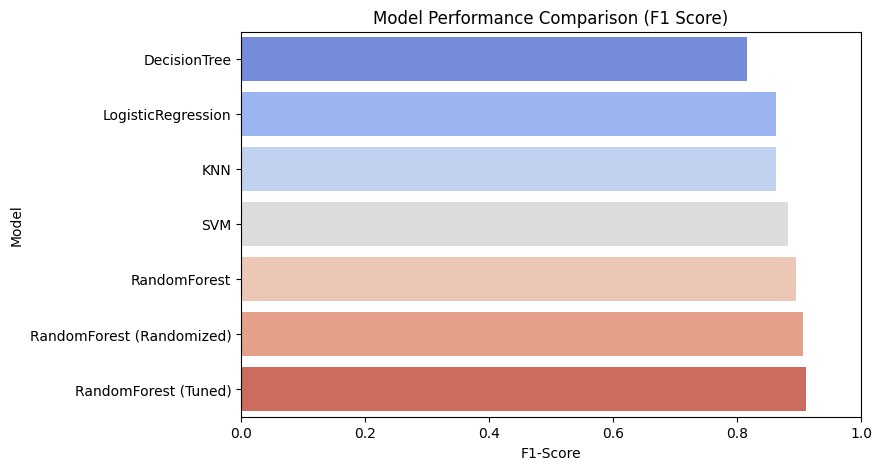

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=results_df.sort_values(by='F1-Score', ascending=True),
            x='F1-Score', y='Model', palette='coolwarm')
plt.title("Model Performance Comparison (F1 Score)")
plt.xlim(0, 1)
plt.show()


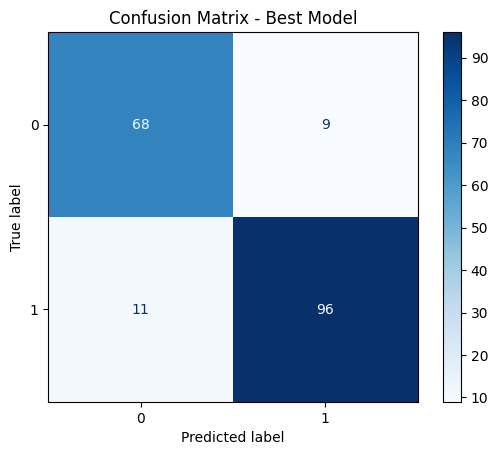

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model = random_search.best_estimator_  # or use grid.best_estimator_
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Best Model")
plt.show()
